In [505]:
# Importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and cleaning data

In [506]:
# reading datasets we have

cust_data = pd.read_csv(r"C:\Users\sinha\Downloads\customer_data.csv")
int_data = pd.read_csv(r"C:\Users\sinha\Downloads\internet_data.csv")
churn_data = pd.read_csv(r"C:\Users\sinha\Downloads\churn_data.csv")

In [507]:
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [508]:
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [509]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [510]:
# merging dataframes by customerID
churn_data = pd.merge(int_data, churn_data, how='inner', on= 'customerID')

In [511]:
churn_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [512]:
data = pd.merge(cust_data, churn_data, how='inner', on='customerID')

In [513]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [515]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [516]:
# changing Categorical Yes/No to 0/1
print(data.Partner.value_counts())
print(data.OnlineSecurity.value_counts())
print(data.PhoneService.value_counts())
print(data.OnlineBackup.value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


# Encoding categorical variable

In [517]:
# we will check binary category only and convert
bin_var = ['Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn' ]

def binary_converter(x):
    return x.apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [518]:
data[bin_var] = binary_converter(data[bin_var])

In [519]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,...,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,...,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,...,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [520]:
var2 = ['gender', 'PaymentMethod', 'Contract', 'InternetService']
df1 = pd.get_dummies(data[var2], drop_first=True)

In [521]:
data = data.drop(var2, axis=1)

In [522]:
data = pd.concat([data,df1], axis =1)

In [523]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,No phone service,No,Yes,No,No,No,...,29.85,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,0,0,No,Yes,No,Yes,No,No,...,1889.5,0,1,0,0,1,1,0,0,0
2,3668-QPYBK,0,0,0,No,Yes,Yes,No,No,No,...,108.15,1,1,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,No phone service,Yes,No,Yes,Yes,No,...,1840.75,0,1,0,0,0,1,0,0,0
4,9237-HQITU,0,0,0,No,No,No,No,No,No,...,151.65,1,0,0,1,0,0,0,1,0


In [524]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(data['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(data['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(data['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(data['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(data['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm1 = pd.get_dummies(data['StreamingMovies'], prefix='StreamingMovies')
sm2 = sm1.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,sm2], axis=1)

In [525]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,No phone service,No,Yes,No,No,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,No,Yes,No,Yes,No,No,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,No,Yes,Yes,No,No,No,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,No phone service,Yes,No,Yes,Yes,No,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,No,No,No,No,No,No,...,1,0,1,0,1,0,1,0,1,0


In [526]:
data= data.drop(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies'],1)

In [527]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   uint8  
 11  Paym

In [529]:
# Checking null values in column
(data == ' ').sum(axis=0)

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [530]:
# Removing that 11 row from dataframe as 11/7043 = 0.15% and removing 0.15% of row will not affect our model
data = data[~(data['TotalCharges'] == ' ')]

In [531]:
# Converting object  dtype to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  gender_Male                            7032 non-null   uint8  
 11  Paym

In [533]:
# Checking dataframe for outliers
data.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.504693,...,0.438993,0.344852,0.439989,0.343857,0.493743,0.290102,0.399460,0.384386,0.395478,0.388367
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.500014,...,0.496300,0.475354,0.496421,0.475028,0.499996,0.453842,0.489822,0.486484,0.488988,0.487414
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,1.000000,1.000000,69.000000,1.000000,1.000000,102.645000,5976.640000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,107.422500,6923.590000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,114.734500,8039.883000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 2: Splitting into train test split

In [534]:
y = data.pop('Churn')
X = data.drop('customerID', axis=1)

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Feature Scaling

In [536]:
# Using StandardScalar
sta_scalar = StandardScaler()

var3=['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[var3] = sta_scalar.fit_transform(X_train[var3])

In [537]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [538]:
# checking the churn rate
churn_rate = sum(y)/len(y)*100
print(churn_rate,"%")

26.578498293515356 %


- We have almost 27% churn rate

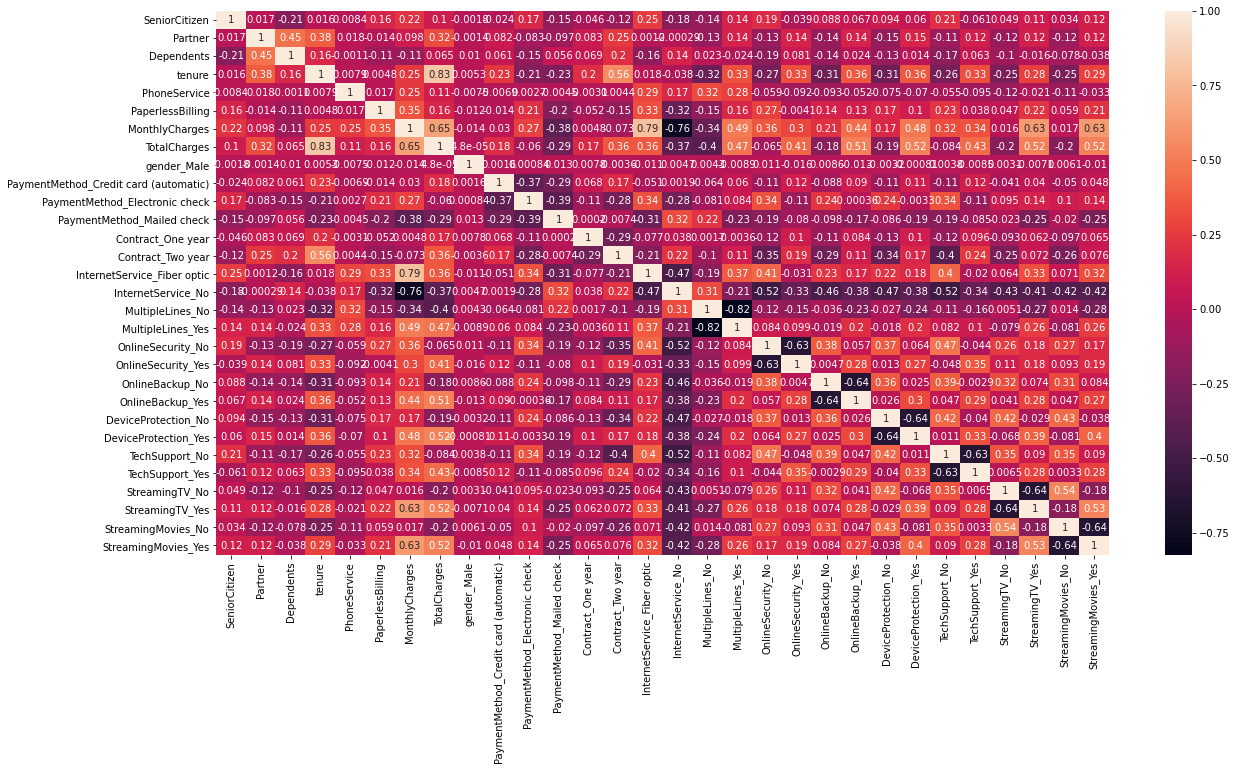

In [539]:
# Heatmap to see correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [540]:
X_train = X_train.drop(['StreamingMovies_No', 'StreamingTV_No', 'TechSupport_No',
                       'DeviceProtection_No', 'OnlineBackup_No', 'MultipleLines_No', 'OnlineSecurity_No'], axis=1 )
X_test = X_test.drop(['StreamingMovies_No', 'StreamingTV_No', 'TechSupport_No',
                       'DeviceProtection_No', 'OnlineBackup_No', 'MultipleLines_No', 'OnlineSecurity_No'], axis=1 )

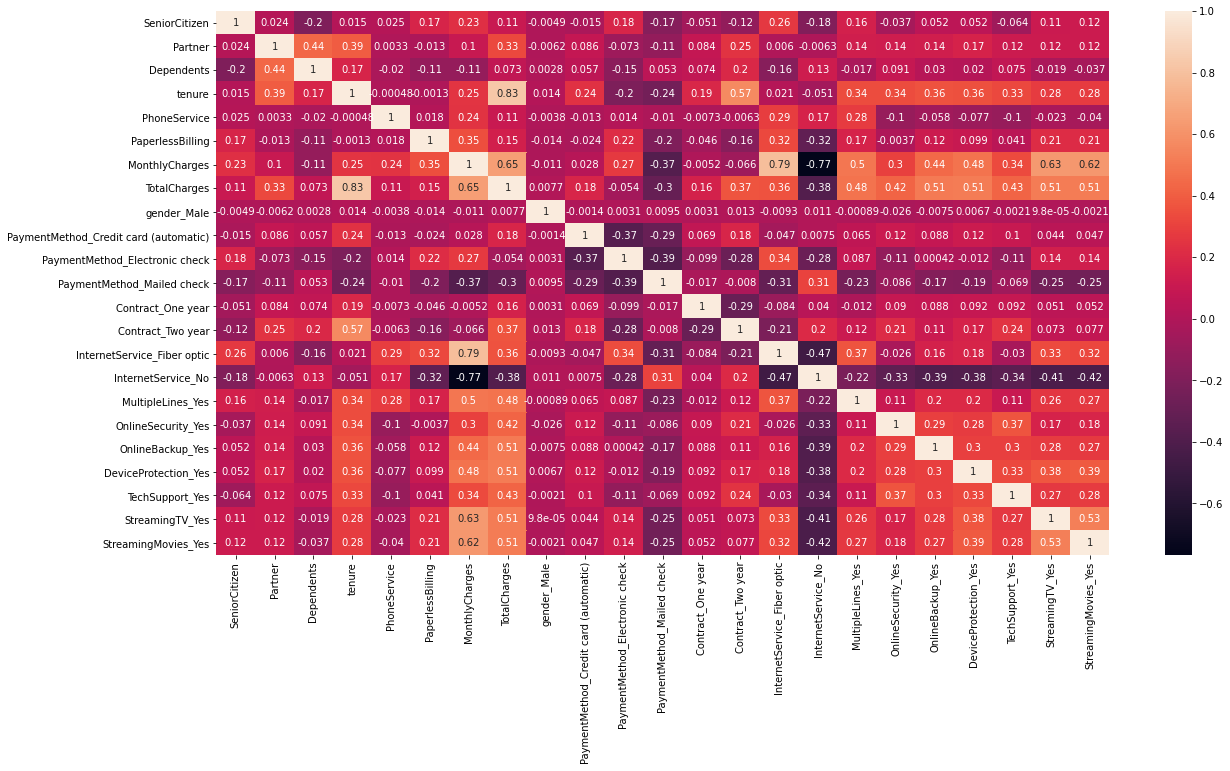

In [541]:
# checking correlation now
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Step 4: Building model

In [542]:
# making first model
lrm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
lrm_model = lrm.fit()

In [543]:
lrm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 19 Jun 2022   Deviance:                       4009.4
Time:                        13:20:17   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Feature Elimination using RFE

In [544]:
# Building logistic Regression instance
logR = LogisticRegression()

In [545]:
rfe = RFE(logR, 15)
rfe = rfe.fit(X_train, y_train)

In [546]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [547]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 8),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [548]:
cols = X_train.columns[rfe.support_]

In [549]:
# building model with these 15 variable
lrm1 = sm.GLM(y_train, (sm.add_constant(X_train[cols])), family = sm.families.Binomial())

lrm1 = lrm1.fit()
lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 19 Jun 2022   Deviance:                       4022.2
Time:                        13:20:18   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [550]:
# predicting on training
X_train_sm = sm.add_constant(X_train[cols])

y_train_pred = lrm1.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [551]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.19264205, 0.27562384, 0.59950707, ..., 0.03924737, 0.12914179,
       0.03145932])

In [552]:
# creating a dataframe for predicted and real values 

train_pred_actual = pd.DataFrame({'Churn': y_train.values, 'predicted': y_train_pred})
train_pred_actual["Cust_id"] = y_train.index
train_pred_actual.head()

,Churn,predicted,Cust_id
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


In [553]:
train_pred_actual['predicted_mapped'] = train_pred_actual.predicted.map(lambda x: 1 if x>0.5 else 0)
train_pred_actual.head()

,Churn,predicted,Cust_id,predicted_mapped
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [554]:
# Evaluating accuracy
confusion = metrics.confusion_matrix(train_pred_actual.Churn, train_pred_actual.predicted_mapped)

In [555]:
confusion


array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [556]:
print((metrics.accuracy_score(train_pred_actual.Churn, train_pred_actual.predicted_mapped))*100)

81.02397399431126


In [557]:
# calculation VIF
vif= pd.DataFrame()
vif["variables"] = X_train[cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending= False)
vif

,variables,VIF
3,MonthlyCharges,14.85
4,TotalCharges,10.42
1,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
8,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
2,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [558]:
# drop MonthlyCharges
cols = cols.drop("MonthlyCharges", 1)


In [559]:
lrm1 = sm.GLM(y_train, (sm.add_constant(X_train[cols])), family = sm.families.Binomial())

lrm1 = lrm1.fit()
lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sun, 19 Jun 2022   Deviance:                       4046.2
Time:                        13:20:19   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [560]:
# predicting on training
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = lrm1.predict(X_train_sm).values.reshape(-1)

In [561]:
train_pred_actual['predicted'] = y_train_pred

In [562]:
train_pred_actual['predicted_mapped'] = train_pred_actual.predicted.map(lambda x: 1 if x>0.5 else 0)

In [563]:
print((metrics.accuracy_score(train_pred_actual.Churn, train_pred_actual.predicted_mapped))*100)

80.57700121901667


In [564]:
# calculation VIF
vif= pd.DataFrame()
vif["variables"] = X_train[cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending= False)
vif

,variables,VIF
3,TotalCharges,7.46
1,tenure,6.90
7,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
2,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [565]:
# drop TotalCharges
cols = cols.drop("TotalCharges", 1)

In [566]:
lrm1 = sm.GLM(y_train, (sm.add_constant(X_train[cols])), family = sm.families.Binomial())

lrm1 = lrm1.fit()
lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sun, 19 Jun 2022   Deviance:                       4051.9
Time:                        13:20:19   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [567]:
# predicting on training
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = lrm1.predict(X_train_sm).values.reshape(-1)

In [568]:
train_pred_actual['predicted'] = y_train_pred

In [569]:
train_pred_actual['predicted_mapped'] = train_pred_actual.predicted.map(lambda x: 1 if x>0.5 else 0)

In [570]:
print((metrics.accuracy_score(train_pred_actual.Churn, train_pred_actual.predicted_mapped))*100)

80.6176351076798


In [571]:
# calculation VIF
vif= pd.DataFrame()
vif["variables"] = X_train[cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending= False)
vif

,variables,VIF
6,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
2,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
1,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
5,Contract_One year,1.78


# Evaluation model beyond Accuracy

In [572]:
# defining TP,TN,FP,FN
TP = confusion[1,1] # truepositive
TN = confusion[0,0] # truenegative
FP = confusion[0,1] # falsepositive
FN = confusion[1,0] # falsenegative

In [573]:
# sensitivity
TP /float(TP+FN)

0.554001554001554

In [574]:
# specificity
TN /float(TN+FP)

0.9009628610729024

In [575]:
 # False positive rate - who will not churn but predicted churn
FP/float(FP+TN)

0.09903713892709766

In [576]:
# positive predictive value
TP/float(TP+FP)

0.6644920782851818

In [577]:
# negative predictive value
TN/float(TN+FN)

0.8508703559366069

In [578]:
# exporting train_pre_actual dataframe to csv
train_pred_actual.to_csv("churn_prediction.csv")

# ROC curve


In [579]:
def roc_curve(actual,pred):
    fpr, tpr, threshold = metrics.roc_curve(actual, pred, drop_intermediate=False)
    area_roc = metrics.roc_auc_score(actual, pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label = 'Area under curve = %0.2f'% area_roc)
    plt.xlabel("False positive rate(1-specificity)")
    plt.ylabel("True positive rate(sensitivity)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    

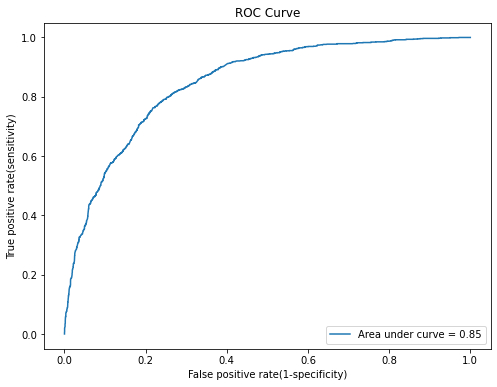

In [580]:
roc_curve(train_pred_actual.Churn, train_pred_actual.predicted)

# Calculating Accuracy sensitivity and specificity

In [581]:
number = [float(x/10) for x in range(10)]
for i in number:
    train_pred_actual[i] = train_pred_actual.predicted.map(lambda x: 1 if x>=i else 0)
train_pred_actual.head()

,Churn,predicted,Cust_id,predicted_mapped,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [582]:
df_metrics = pd.DataFrame(columns= ['cutoff' ,'accuracy', 'sensitivity', 'specificity'])

for i in number:
    confusion2 = metrics.confusion_matrix(train_pred_actual["Churn"], train_pred_actual[i])
    TP = confusion2[1,1]
    TN = confusion2[0,0]
    FP = confusion2[0,1]
    FN = confusion2[1,0]
    accuracy = float(TP+TN)/float(TP+TN+FP+FN)
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    df_metrics.loc[i] = [i, accuracy, sensitivity, specificity]   
df_metrics

,cutoff,accuracy,sensitivity,specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.614994,0.943279,0.498762
0.2,0.2,0.721861,0.846154,0.677854
0.3,0.3,0.770012,0.776224,0.767813
0.4,0.4,0.790532,0.636364,0.845117
0.5,0.5,0.806176,0.536131,0.901788
0.6,0.6,0.798050,0.380730,0.945805
0.7,0.7,0.776310,0.196581,0.981568
0.8,0.8,0.747867,0.041181,0.998074
0.9,0.9,0.738521,0.000000,1.000000


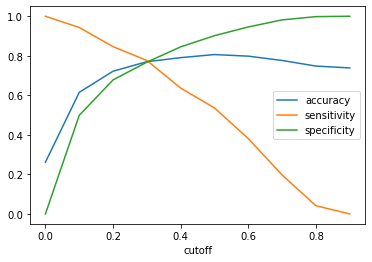

In [583]:
df_metrics.plot.line(x= "cutoff", y= ["accuracy", "sensitivity", "specificity"])
plt.show()

 - from above we can see at cutoff 0.3 approx the acuracy is good sensitivty and specificity all three are decent at the intersection and we need high sensitivity and low 1-specificty which implies best at intersection

In [584]:
# Lets now add the this cutoff in our train_pred_actual dataframe
train_pred_actual["final_predicted"] = train_pred_actual.predicted.map(lambda x: 1 if x > 0.3 else 0)
train_pred_actual.head()

,Churn,predicted,Cust_id,predicted_mapped,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [585]:
confusion_final = metrics.confusion_matrix(train_pred_actual.Churn, train_pred_actual.final_predicted)

In [586]:
TP = confusion_final[1,1]
TN = confusion_final[0,0]
FP = confusion_final[0,1]
FN = confusion_final[1,0]
print("Accuracy = ", float(TP+TN)/float(TP+TN+FP+FN))
print("Sensitivity = ", TP/float(TP+FN))
print("Specificity = ", TN/float(TN+FP))

Accuracy =  0.7700121901665989
Sensitivity =  0.7762237762237763
Specificity =  0.7678129298486933


In [587]:
FN

288

In [588]:
confusion_final

array([[2791,  844],
       [ 288,  999]], dtype=int64)

**Precision** = TP /TP + FP 

In [589]:
TP/float(TP+FP)

0.5420510037981552

**Recall** = TP /TP+FN

In [590]:
TP/float(TP+FN)

0.7762237762237763

In [591]:
# through sklearn we got a function from metrics class

In [592]:
metrics.precision_score(train_pred_actual.Churn, train_pred_actual.final_predicted)

0.5420510037981552

In [593]:
metrics.recall_score(train_pred_actual.Churn, train_pred_actual.final_predicted)

0.7762237762237763

In [594]:
p, r, threshold = metrics.precision_recall_curve(train_pred_actual.Churn, train_pred_actual.predicted)

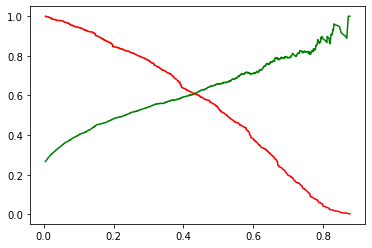

In [595]:
plt.plot(threshold, p[:-1], 'g-')
plt.plot(threshold, r[:-1], 'r-')
plt.show()

# Making predictions on test set

In [596]:
X_test[var3] = sta_scalar.transform(X_test[var3])

In [597]:
X_test = X_test[cols]
X_test.head()

,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,1,1,0,0,0,1,0,0,0,0,1
3730,0,0.999203,1,1,0,0,0,1,0,1,0,1,1
1761,0,1.040015,1,1,0,0,1,0,1,1,0,0,0
2283,0,-1.286319,1,0,1,0,0,1,0,0,0,0,0
1872,0,0.346196,0,0,0,0,1,0,1,0,0,0,0


In [598]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lrm1.predict(X_test_sm)

In [599]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.4197249 , 0.26023229, 0.00864986, ..., 0.00834799, 0.50361892,
       0.00548729])

Creating Dataframe for test prediction

In [600]:
test_df = pd.DataFrame({'Churn': y_test.values, 'predicted': y_test_pred})
test_df["Cust_id"] = y_test.index
test_df.head()

,Churn,predicted,Cust_id
0,0,0.419725,942
1,1,0.260232,3730
2,0,0.008650,1761
3,1,0.592626,2283
4,0,0.013989,1872


In [601]:
test_df["churn_predicted"] = test_df.predicted.map(lambda x : 1 if x > 0.3 else 0)
test_df.head()

,Churn,predicted,Cust_id,churn_predicted
0,0,0.419725,942,1
1,1,0.260232,3730,0
2,0,0.008650,1761,0
3,1,0.592626,2283,1
4,0,0.013989,1872,0


In [603]:
# Calulating sensitivity and specificity
metrics.accuracy_score(test_df.Churn, test_df.churn_predicted)

0.7407582938388626

In [604]:
conf_matr = metrics.confusion_matrix(test_df.Churn, test_df.churn_predicted)

In [605]:
TP = conf_matr[1,1]
TN = conf_matr[0,0]
FP = conf_matr[0,1]
FN = conf_matr[1,0]

In [606]:
# sensitivity
TP/float(TP+FN)

0.7199312714776632

In [607]:
# specificity
TN/float(TN+FP)

0.7486910994764397